In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import networkx as nx

# STUDENT ID NUMBER: 

# INSTRUCTIONS

1. Put your student ID number (no other identifying features).  
If collaborating, put collaborators' id numbers underneath (again, no identifying features).
1. Submit both a notebook and exported PDF of the notebook after restart-and-run-all.  
    1. Submitted notebook must run in reasonable time.
    1. Ensure the exported pdf is LaTex formatted. 
1. No formal written section, but if your algorithm has an explicit recurrence relation, justify its usage in a separate typeset pdf.
1. For the coding section:
    1. Limit code answers to the designated spaces in functions (marked off by "###") and cells (marked by "### DO: *\<instructions\>*").  
       You may add extra cells to run subroutines (in order), but only marked cells will be graded. 
    1. Do not change the provided cells, or their order.  
       Any detected alterations will zero out that section. 
       
### Tips
- You are encouraged to work either alone or with your official partner, but not more.  
- For the coding section, test and sanity-check your work extensively.  
- For written questions on the coding exercises, if you really understand the solution, the answer should fit in 1-3 sentences.  

# Coding [$4 \times 25 = 100$ pts]

## Ex. 1 - Linear Partition

See Section 8.5 of Skiena


In [2]:
### DO: Make a function that takes in nonnegative array A, and integer k. 
### Return the partition into k or fewer ranges to minimize the maximum sum over all ranges without reordering.  

def partition(s, n, k):
    m = [[0] * (k + 1) for _ in range(n + 1)]
    d = [[0] * (k + 1) for _ in range(n + 1)]
    p = [0] * (n + 1)

    for i in range(1, n + 1):
        p[i] = p[i - 1] + s[i - 1]

    for i in range(1, n + 1):
        m[i][1] = p[i]
    for j in range(1, k + 1):
        m[1][j] = s[0]

    for i in range(2, n + 1):
        for j in range(2, k + 1):
            m[i][j] = float('inf')
            for x in range(1, i):
                cost = max(m[x][j - 1], p[i] - p[x])
                if m[i][j] > cost:
                    m[i][j] = cost
                    d[i][j] = x

    return get_partitions(s, d, n, k)  # Return partitions instead of printing

def get_partitions(s, d, n, k):
    partitions = []
    while k > 1:
        x = d[n][k]
        partitions.insert(0, s[x:n])
        n = x
        k -= 1
    partitions.insert(0, s[:n])
    return partitions



In [3]:
### DO: Prove your code works.

s = [100, 200, 300, 400, 500, 600, 700, 800, 900]
n = len(s)
k = 3

result = partition(s, n, k)
for group in result:
    print(group)



[100, 200, 300, 400, 500]
[600, 700]
[800, 900]


## Ex. 2 - Max Sum Path

Source: [Project Euler](https://projecteuler.net/problem=18)

Play the following game: 

Make a Pascal triangle of height $N$, where the entries are random integers between 0 and 100.  
Starting from the top, make a path by choosing any adjacent elements in the row below.  
Do this until you reach the bottom, and add them up - this makes the *path sum*. 

Find the maximum path sum for a given triangle by dynamic programming. 

In [11]:
### DO: Generate a Pascal triangle arrangement of height N, but filled with random integers between 0 and 100. 

import random

def generate_random_triangle(height, low=0, high=100):
    triangle = []
    for i in range(height):
        row = [random.randint(low, high) for _ in range(i + 1)]
        triangle.append(row)
    return triangle

N = 100
triangle = generate_random_triangle(N)

print("Generated triangle:")
for row in triangle:
    print(row)


Generated triangle:
[74]
[98, 14]
[94, 70, 30]
[98, 3, 46, 9]
[63, 21, 76, 76, 91]
[72, 32, 49, 100, 16, 81]
[97, 79, 17, 16, 7, 35, 49]
[46, 49, 34, 84, 91, 55, 46, 69]
[46, 31, 99, 89, 8, 80, 73, 8, 67]
[44, 78, 72, 2, 23, 6, 75, 11, 61, 1]
[57, 86, 93, 30, 39, 55, 97, 63, 64, 44, 63]
[88, 80, 25, 94, 36, 74, 3, 30, 14, 75, 12, 15]
[77, 70, 0, 15, 72, 96, 14, 67, 43, 86, 56, 53, 66]
[14, 25, 99, 33, 47, 74, 71, 49, 93, 39, 21, 60, 46, 96]
[61, 82, 98, 65, 54, 76, 90, 35, 72, 96, 45, 38, 6, 76, 59]
[51, 18, 41, 27, 40, 30, 25, 68, 6, 36, 84, 79, 89, 79, 14, 74]
[55, 55, 61, 90, 31, 8, 0, 79, 8, 50, 81, 62, 14, 83, 27, 89, 64]
[54, 81, 72, 34, 38, 38, 32, 29, 60, 99, 46, 25, 79, 44, 46, 33, 92, 24]
[35, 45, 11, 98, 93, 53, 21, 85, 90, 94, 55, 49, 39, 50, 15, 82, 18, 5, 94]
[64, 18, 20, 51, 15, 85, 51, 85, 29, 21, 4, 12, 27, 49, 46, 56, 91, 27, 99, 4]
[28, 59, 33, 93, 27, 9, 30, 56, 72, 79, 86, 85, 81, 19, 92, 18, 83, 76, 78, 11, 80]
[69, 51, 85, 70, 54, 28, 27, 99, 97, 40, 59, 78, 12, 

In [5]:
### DO: Find the max sum path for a triangle

def max_path_sum(triangle):
    dp = [row[:] for row in triangle]

    for row in range(len(dp) - 2, -1, -1):
        for col in range(len(dp[row])):
            dp[row][col] += max(dp[row + 1][col], dp[row + 1][col + 1])

    return dp[0][0]
    
max_sum = max_path_sum(triangle)
print("Maximum path sum:", max_sum)


Maximum path sum: 224


In [6]:
### DO: Prove it works to at least N = 100

import time

N_large = 100
triangle_100 = generate_random_triangle(N_large)

start_time = time.time()
max_sum_100 = max_path_sum(triangle_100)
end_time = time.time()

print(f"Max path sum for triangle of height {N_large}: {max_sum_100}")
print(f"Completed in {end_time - start_time:.4f} seconds")


Max path sum for triangle of height 100: 7655
Completed in 0.0003 seconds


## Ex. 3 -  Dynamic Programming for Dynamics  

Consider 2 points $(x_1, y_1)$ and $(x_2, y_2)$ where $x_1 < x_2$ and $y_1> y_2$.  
Let a ball of mass $m$ move from the higher point to the lower point under the influence of a gravitational field.  
Find the trajectory that minimizes the travel time by dynamic programming.  



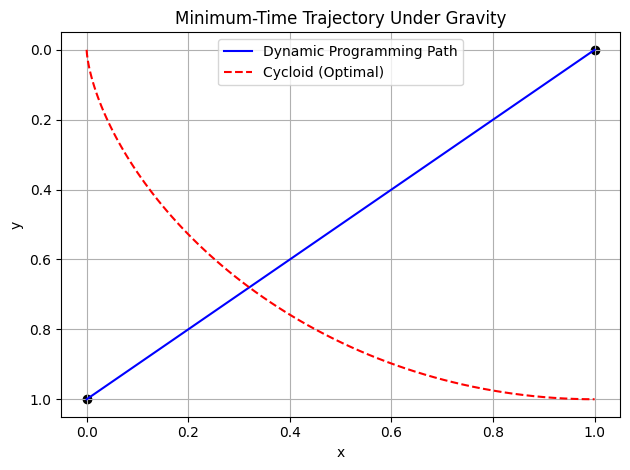

In [7]:
### DO: Find and plot the trajectory described above via dynamic programming. 
### Compare it to the theoretically optimal trajectory.

import matplotlib.pyplot as plt

g = 9.81
n = 200
x = np.linspace(0, 1, n)
y = np.linspace(1, 0, n)

T = np.full((n, n), np.inf)
P = np.full((n, n, 2), -1, int)
T[0, 0] = 0

for i in range(1, n):
    for j in range(1, n):
        best_time = np.inf
        best_k, best_l = -1, -1
        for k in range(max(0, i - 20), i):  # restrict horizontal search range
            for l in range(max(0, j - 20), j):  # restrict vertical search range
                dx = x[i] - x[k]
                dy = y[j] - y[l]
                h = y[l] - y[j]
                if h <= 0: continue
                v = np.sqrt(2 * g * h)
                t = np.hypot(dx, dy) / v
                total_time = T[k, l] + t
                if total_time < best_time:
                    best_time = total_time
                    best_k, best_l = k, l
        if best_k != -1:
            T[i, j] = best_time
            P[i, j] = [best_k, best_l]

i, j = n - 1, np.argmin(T[-1])
px, py = [], []
while i >= 0 and j >= 0 and P[i, j, 0] != -1:
    px.append(x[i])
    py.append(y[j])
    i, j = P[i, j]
px.append(x[0])
py.append(y[0])
px.reverse()
py.reverse()

theta = np.linspace(0, np.pi, 100)
R = 0.5
cx = R * (theta - np.sin(theta))
cy = R * (1 - np.cos(theta))
cx *= 1 / cx[-1]
cy *= 1 / cy[-1]

plt.plot(px, py, 'b-', label='Dynamic Programming Path')
plt.plot(cx, cy, 'r--', label='Cycloid (Optimal)')
plt.scatter([0, 1], [1, 0], c='k')
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Minimum-Time Trajectory Under Gravity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ex. 4 - Eggplant Edits

The name "eggplant" is apparently from the white color of (some) species of eggplant, at least in American English.  
In other parts of the world, it is known by other (anglicized) names like "aubergine," "brinjal," and "berenjena."   
It is [hypothesized](https://www.youtube.com/watch?v=mQoNAR1um_c) that these names are all related to each other as loanwords, corruptions, or mutations of each other.  

Find a list of at least 10 (anglicized) names for eggplant in other languages.  
Calculate the Levenshtein edit distance between all pairs by dynamic programming.  
Construct the MST and compare this to the historical/geographical relationships between countries. 

In [8]:
### DO: Make a list L of at least 10 anglicized names for egpplant. 

L = ["eggplant", "vatingan", "vangi", "begun", "baingan", "badenjan", "albadenjan", "beringela", "brinjal", "alberginia"]

In [9]:
### DO: Make a function to calculate the Levenshtein edit distance and calculate it for all the pairs. 

def levenshtein_dp(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,      # deletion
                dp[i][j - 1] + 1,      # insertion
                dp[i - 1][j - 1] + cost  # substitution
            )
    return dp[m][n]

In [10]:
### DO: Create the distance matrix and MST of the edit distances.  
### Compare to the distance matrix and MST of at least the geographical distances of the capitals. 

n = len(L)
dist_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i != j:
            dist_matrix[i][j] = levenshtein_dp(L[i], L[j])
        else:
            dist_matrix[i][j] = 0


G = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(L[i], L[j], weight=dist_matrix[i][j])

mst = nx.minimum_spanning_tree(G)
print("MST based on Levenshtein distances:")
for edge in mst.edges(data=True):
    print(edge)


# Map names to approximate capital coordinates (lat, lon)
capital_coords = {
    "eggplant": (51.5074, -0.1278),       # London
    "vatingan": (38.7223, -9.1393),       # Lisbon
    "vangi": (19.0760, 72.8777),          # Mumbai (Marathi)
    "begun": (23.8103, 90.4125),          # Dhaka
    "baingan": (28.6139, 77.2090),        # Delhi
    "badenjan": (35.6892, 51.3890),       # Tehran
    "albadenjan": (24.7136, 46.6753),     # Riyadh
    "beringela": (15.7835, -90.2308),     # Guatemala City (Portuguese in Brazil too)
    "brinjal": (20.5937, 78.9629),        # India (English/Colonial)
    "alberginia": (41.3851, 2.1734),      # Barcelona (Catalan)
}

geo_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            coord1 = capital_coords[L[i]]
            coord2 = capital_coords[L[j]]
            geo_matrix[i][j] = geodesic(coord1, coord2).kilometers

G_geo = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G_geo.add_edge(L[i], L[j], weight=geo_matrix[i][j])

geo_mst = nx.minimum_spanning_tree(G_geo)
print("\nMST based on geographical distances:")
for edge in geo_mst.edges(data=True):
    print(edge)


MST based on Levenshtein distances:
('eggplant', 'begun', {'weight': np.int64(6)})
('vatingan', 'baingan', {'weight': np.int64(2)})
('vatingan', 'vangi', {'weight': np.int64(4)})
('begun', 'baingan', {'weight': np.int64(4)})
('begun', 'alberginia', {'weight': np.int64(6)})
('baingan', 'badenjan', {'weight': np.int64(3)})
('baingan', 'brinjal', {'weight': np.int64(3)})
('badenjan', 'albadenjan', {'weight': np.int64(2)})
('beringela', 'brinjal', {'weight': np.int64(4)})

MST based on geographical distances:
('eggplant', 'alberginia', {'weight': np.float64(1138.8468170547046)})
('vatingan', 'alberginia', {'weight': np.float64(1008.6624613171384)})
('vatingan', 'beringela', {'weight': np.float64(8167.481277062782)})
('vangi', 'brinjal', {'weight': np.float64(659.1710784242706)})
('begun', 'brinjal', {'weight': np.float64(1232.6955043589742)})
('baingan', 'brinjal', {'weight': np.float64(905.9190510935213)})
('baingan', 'badenjan', {'weight': np.float64(2550.157493013408)})
('badenjan', 'al